In [1]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
tpf = TessTargetPixelFile(r"D:\downloads\MAST_2021-08-29T0158\MAST_2021-08-29T0158\TESS\tess2018319095959-s0005-0000000399665349-0125-s/tess2018319095959-s0005-0000000399665349-0125-s_tp.fits")
tpf 

TessTargetPixelFile(TICID: 399665349)

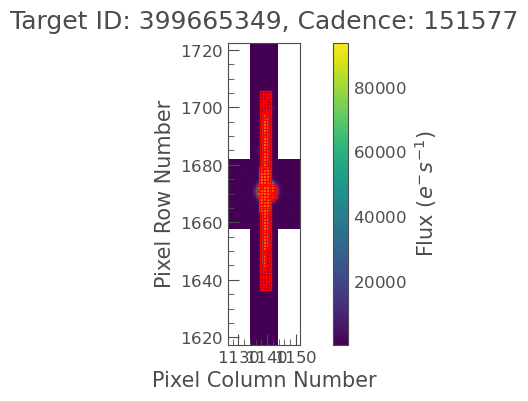

In [2]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

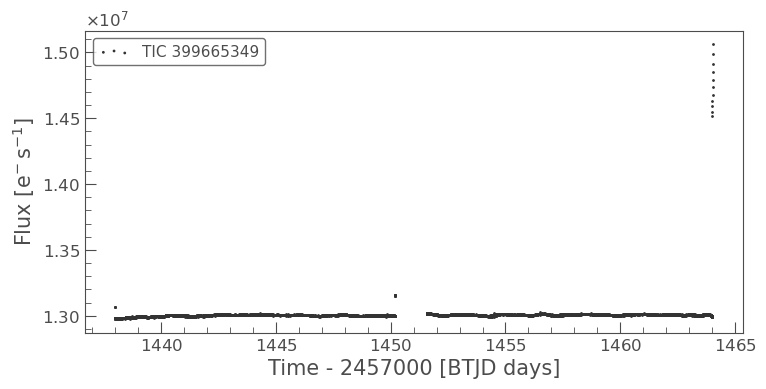

In [3]:
lc = tpf.to_lightcurve()
lc.scatter();

In [4]:
mask = (lc.time.value < 1464)
masked_lc = lc[mask]

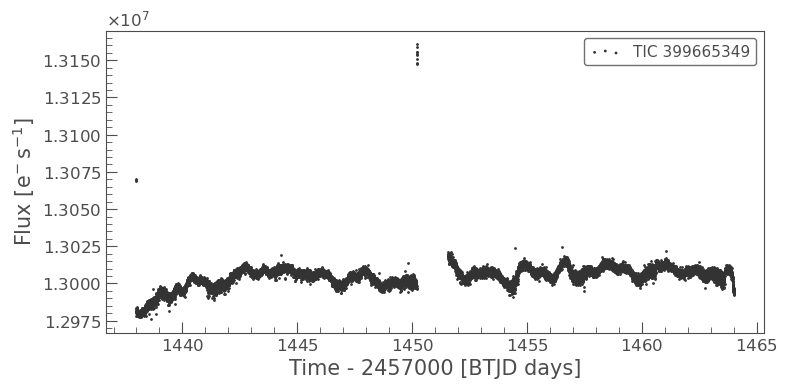

In [5]:
masked_lc.scatter();

In [6]:
clipped_lc = masked_lc.remove_outliers(sigma=5);

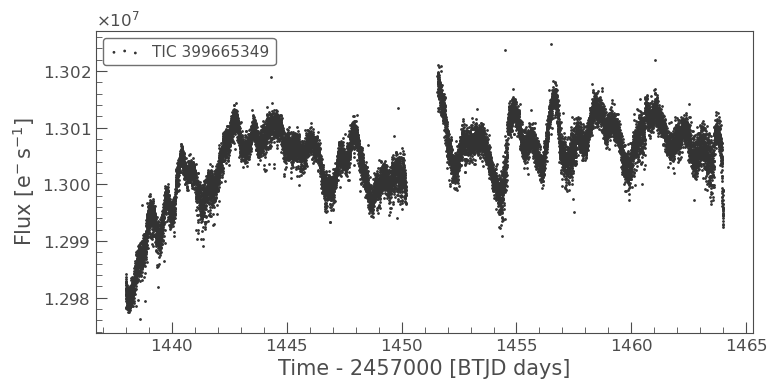

In [7]:
clipped_lc.scatter();

In [8]:
flat_lc = clipped_lc.flatten()

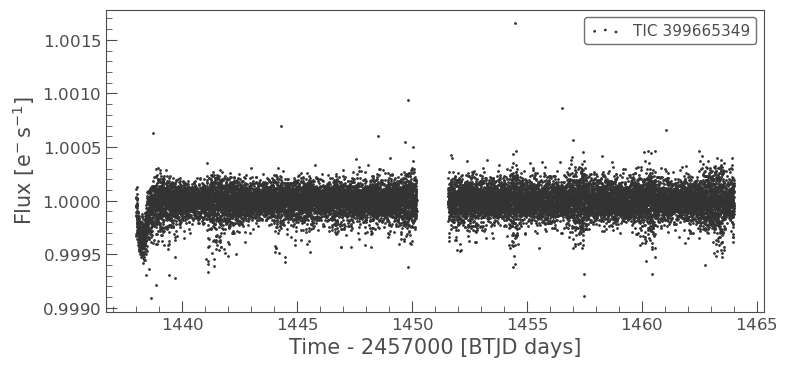

In [9]:
flat_lc.scatter();

In [10]:
binned_lc = flat_lc.bin(binsize=5)

<ipython-input-10-9eeec4c6eaed>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = flat_lc.bin(binsize=5)


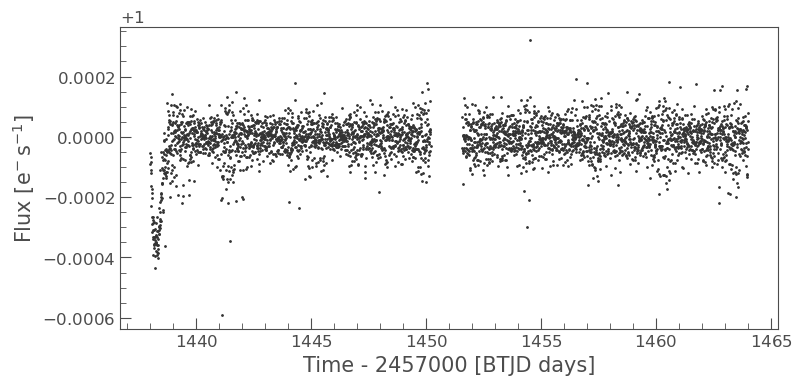

In [11]:
binned_lc.scatter();

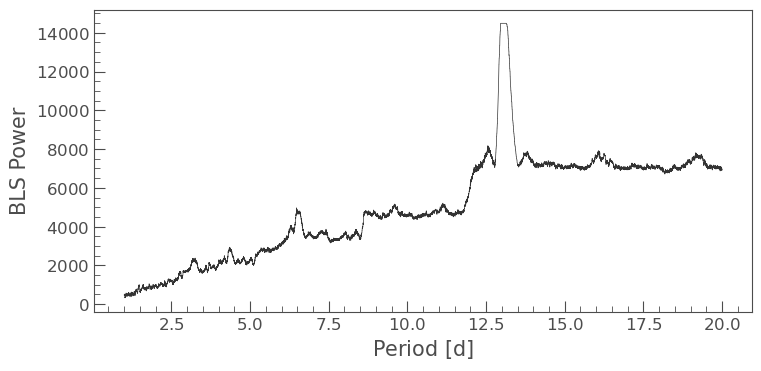

In [12]:
import numpy as np
periodogram = binned_lc.to_periodogram(method="bls", period=np.arange(1, 20, 0.001))
periodogram.plot();

In [13]:
planet_b_period = periodogram.period_at_max_power
planet_b_t0 = periodogram.transit_time_at_max_power
planet_b_dur = periodogram.duration_at_max_power

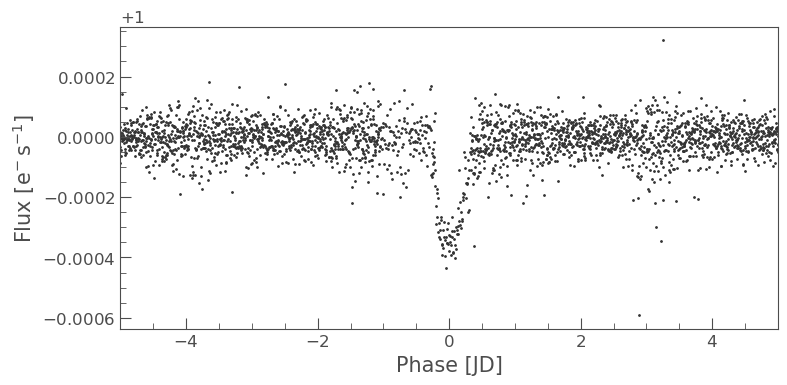

In [14]:
ax = binned_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [15]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 12.987 d


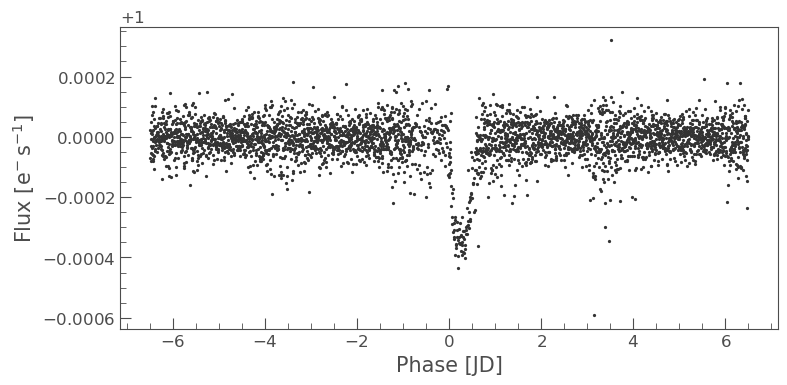

In [16]:
folded_lc = binned_lc.fold(period=12.987)
folded_lc.scatter(s=7);

In [17]:
planet_b_period

<Quantity 12.987 d>

In [18]:
planet_b_model = periodogram.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

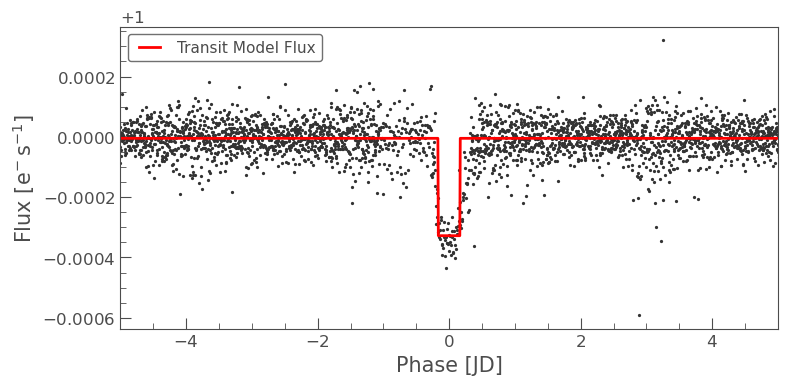

In [19]:
ax = binned_lc.fold(planet_b_period, planet_b_t0).scatter(s=7)
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);